In [19]:
import chemprop
import pandas as pd
import numpy as np
from utils import utils

In [11]:
original = pd.read_csv(r'./data/train_dm300_full.csv')

In [12]:
solvents = ["MeOH", "EtOH", "IPA", "Tol", "Hept", "Acet", "MeCN", "MTBE", "MeTHF", "DMF", "EtOAc"]
solvent_names = {"Methanol":"Methanol", 
                "Ethanol":"Ethanol", 
                "2-Propanol":"2-Propanol", 
                "Toluene":"Toluene", 
                "Heptane":"Heptane", 
                "Acetone":"Acetone", 
                "Acetonitrile":"Acetonitrile", 
                "Methyl tert butyl ether":"Methyl\ntert-butyl ether", 
                "2-Methly tetrahydrofurane":"2-Methyl\ntetrahydrofurane",
                "Dimethyl formamide":"Dimethyl\nformamide", 
                "Etyl acetate":"Ethyl\nacetate" }

solvent_dict = {}
for solvent, name in zip(solvents, solvent_names.keys()):
    solvent_dict[solvent] = original[original['solvent_name']==name]

In [13]:
original.to_csv(r'./data/_full.csv')

In [14]:
solvent_dict['MeCN'].to_csv(r'./data/_mecn.csv')
len(solvent_dict['MeCN'])

146

In [15]:
#original = pd.read_csv(r'C:\Users\ignaczg\Dropbox\Gergo Ignacz\Projects\AI\pims\data\perm_data_noned.csv')

for i in range(6):
    print(f'{i}th cycle')
    arguments = [
        '--data_path', './data/_mecn.csv',
        '--dataset_type', 'regression',
        '--save_dir', './data/train_results/removal/',
        '--metric', 'rmse',
        '--quiet',
        '--split_sizes', '0.99', '0.005', '0.005',
        '--target_columns', 'dm300',
        '--smiles_column', 'full_smiles',
        '--epochs', '60'
        ]


    args = chemprop.args.TrainArgs().parse_args(arguments)
    mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

    arguments = [
        '--test_path',  './data/_mecn.csv',
        '--preds_path', './data/predictions/_temp_mecn.csv',
        '--checkpoint_dir', './data/train_results/removal/',
        '--smiles_column', 'full_smiles'
        ]

    args = chemprop.args.PredictArgs().parse_args(arguments)
    preds = chemprop.train.make_predictions(args=args)

    original = pd.read_csv(r'./data/_mecn.csv')
    print('#############################')
    print('ORIGINAL',len(original))
    temp = pd.read_csv(r'./data/predictions/_temp_mecn.csv')
    print('#############################')
    print('TEMP',len(original))

    temp.rename(columns={'dm300':'dm300_pred'}, inplace=True)

    # original['dm300_err'] = np.divide(np.subtract(temp['dm300_pred'], original['dm300']), original['dm300'])
    original['dm300_err'] = np.abs(np.subtract(temp['dm300_pred'], original['dm300']))

    # original['global_err'] = np.abs(np.divide(np.add(original['dm300_err'], np.add(original['d'], np.add(original['co2_err'], np.add(original['o2_err'], np.add(original['n2_err'], original['ch4_err']))))), 6))
    original['dm300_measured'] = temp['dm300_pred']    
    original = original.sort_values('dm300_err', ascending=False)
    original = original[5:]

    original.to_csv(r'./data/_mecn.csv', sep=',')


146it [00:00, 148488.94it/s]
100%|██████████| 146/146 [00:00<00:00, 37999.90it/s]
Fold 0


0th cycle


100%|██████████| 60/60 [00:05<00:00, 10.07it/s]
Model 0 best validation rmse = 0.177370 on epoch 49
Model 0 test rmse = 0.056719         
Ensemble test rmse = 0.056719
1-fold cross validation
	Seed 0 ==> test rmse = 0.056719
Overall test rmse = 0.056719 +/- 0.000000
Elapsed time = 0:00:06
146it [00:00, 230734.13it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 146
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [00:16<00:00, 16.80s/it]
141it [00:00, 172167.94it/s]
100%|██████████| 141/141 [00:00<00:00, 214663.11it/s]
Fold 0


Saving predictions to ./data/predictions/_temp_mecn.csv
Elapsed time = 0:00:17
#############################
ORIGINAL 146
#############################
TEMP 146
1th cycle


100%|██████████| 60/60 [00:06<00:00,  9.98it/s]
Model 0 best validation rmse = 0.004814 on epoch 57
Model 0 test rmse = 0.052134         
Ensemble test rmse = 0.052134
1-fold cross validation
	Seed 0 ==> test rmse = 0.052134
Overall test rmse = 0.052134 +/- 0.000000
Elapsed time = 0:00:06
141it [00:00, 204990.25it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 141
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [00:16<00:00, 16.70s/it]


Saving predictions to ./data/predictions/_temp_mecn.csv
Elapsed time = 0:00:17
#############################
ORIGINAL 141
#############################
TEMP 141
2th cycle


136it [00:00, 175515.49it/s]
100%|██████████| 136/136 [00:00<00:00, 178035.38it/s]
Fold 0
100%|██████████| 60/60 [00:05<00:00, 10.23it/s]
Model 0 best validation rmse = 0.002847 on epoch 15
Model 0 test rmse = 0.043424         
Ensemble test rmse = 0.043424
1-fold cross validation
	Seed 0 ==> test rmse = 0.043424
Overall test rmse = 0.043424 +/- 0.000000
Elapsed time = 0:00:06
136it [00:00, 216562.39it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 136
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [00:16<00:00, 16.64s/it]
131it [00:00, 169271.05it/s]
100%|██████████| 131/131 [00:00<00:00, 197574.19it/s]
Fold 0


Saving predictions to ./data/predictions/_temp_mecn.csv
Elapsed time = 0:00:17
#############################
ORIGINAL 136
#############################
TEMP 136
3th cycle


100%|██████████| 60/60 [00:05<00:00, 10.64it/s]
Model 0 best validation rmse = 0.001977 on epoch 5
Model 0 test rmse = 0.089014         
Ensemble test rmse = 0.089014
1-fold cross validation
	Seed 0 ==> test rmse = 0.089014
Overall test rmse = 0.089014 +/- 0.000000
Elapsed time = 0:00:06
131it [00:00, 196373.78it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 131
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [00:16<00:00, 16.85s/it]
126it [00:00, 135023.58it/s]
100%|██████████| 126/126 [00:00<00:00, 180739.50it/s]
Fold 0


Saving predictions to ./data/predictions/_temp_mecn.csv
Elapsed time = 0:00:17
#############################
ORIGINAL 131
#############################
TEMP 131
4th cycle


100%|██████████| 60/60 [00:05<00:00, 10.96it/s]
Model 0 best validation rmse = 0.002453 on epoch 30
Model 0 test rmse = 0.036193         
Ensemble test rmse = 0.036193
1-fold cross validation
	Seed 0 ==> test rmse = 0.036193
Overall test rmse = 0.036193 +/- 0.000000
Elapsed time = 0:00:06
126it [00:00, 204283.84it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 126
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [00:16<00:00, 16.69s/it]
121it [00:00, 131650.01it/s]
100%|██████████| 121/121 [00:00<00:00, 230896.63it/s]


Saving predictions to ./data/predictions/_temp_mecn.csv
Elapsed time = 0:00:17
#############################
ORIGINAL 126
#############################
TEMP 126
5th cycle


Fold 0
100%|██████████| 60/60 [00:05<00:00, 11.51it/s]
Model 0 best validation rmse = 0.001961 on epoch 7
Model 0 test rmse = 0.161613         
Ensemble test rmse = 0.161613
1-fold cross validation
	Seed 0 ==> test rmse = 0.161613
Overall test rmse = 0.161613 +/- 0.000000
Elapsed time = 0:00:05
121it [00:00, 203737.77it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 121
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".


100%|██████████| 1/1 [00:16<00:00, 16.75s/it]

Saving predictions to ./data/predictions/_temp_mecn.csv
Elapsed time = 0:00:17
#############################
ORIGINAL 121
#############################
TEMP 121


In [8]:
arguments = [
    '--test_path',  './data/_train_dm300_full.csv',
    '--preds_path', './data/predictions/_temp.csv',
    '--checkpoint_dir', './data/train_results/removal/',
    '--smiles_column', 'full_smiles'
    ]
args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)


Loading training args
Setting molecule featurization parameters to default.
Loading data


867it [00:00, 84730.45it/s]
100%|█████████████████████████████████████| 867/867 [00:00<00:00, 146466.15it/s]


Validating SMILES
Test size = 867
Predicting with an ensemble of 1 models



  0%|                                                     | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]

Saving predictions to ./data/predictions/_temp.csv
Elapsed time = 0:00:01


In [54]:
mecn = pd.read_csv(r'./data/predictions/menc_final.csv')
dmf = pd.read_csv(r'./data/predictions/dmf_final.csv')
meoh = pd.read_csv(r'./data/predictions/meoh_final.csv')

In [56]:
total = pd.concat([mecn, dmf, meoh])

In [74]:
temp = original

In [77]:
temp = temp[temp['solvent_name']!='Dimethyl formamide']

In [79]:
full_list = pd.concat([temp, total])

In [82]:
len(full_list)

1087

In [83]:
full_list.to_csv(r'./data/FINAL_LIST.csv')

In [21]:
mecn = pd.read_csv(r'./data/_mecn.csv')
mecn.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,name,container,cas,mw,solute_smiles,solvent_smiles,solvent_name,dm300,dm300_error,full_smiles,dm300_err,dm300_measured
0,78,11,44,74,91,15,593,594,4-Fluoroaniline,CJ64,371-40-4,111.048427,NC1=CC=C(F)C=C1,CC#N,Acetonitrile,0.364620,0.006456,NC1=CC=C(F)C=C1.CC#N,0.229772,0.594392
1,28,5,2,0,8,82,660,661,1-(4-BROMOPHENYL)ETHANOL,RC22,5391-88-8,201.100000,CC(C1=CC=C(C=C1)Br)O,CC#N,Acetonitrile,0.480365,0.003625,CC(C1=CC=C(C=C1)Br)O.CC#N,0.227843,0.708208
2,17,12,3,3,36,58,636,637,NaN,Z43,150-78-7,138.000000,COC1=CC=C(C=C1)OC,CC#N,Acetonitrile,0.510738,0.005879,COC1=CC=C(C=C1)OC.CC#N,0.213527,0.724266
3,92,9,15,26,43,55,633,634,(R)-(_)-1-Indanol,CA170,697-64-3,134.000000,C1CC2=CC=CC=C2C1O,CC#N,Acetonitrile,0.569093,0.005370,C1CC2=CC=CC=C2C1O.CC#N,0.211077,0.780170
4,40,7,18,50,81,33,611,612,5-FLUORO-1H-BENZIMIDAZOLE,RSY44,1977-72-6,136.100000,C1=CC2=C(C=C1F)NC=N2,CC#N,Acetonitrile,0.453443,0.010363,C1=CC2=C(C=C1F)NC=N2.CC#N,0.210446,0.663890


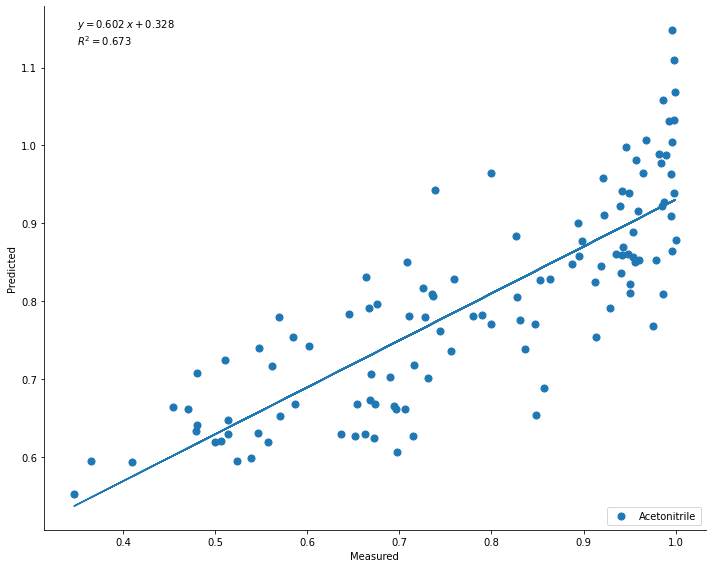

In [22]:
utils.rejection_diagram(data=mecn, x='dm300', y='dm300_measured', x_axis='Measured', y_axis="Predicted", group='solvent_name')